In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# abrir dataset filtrado
df = pd.read_csv("wine_filtered.csv",index_col=0)

In [12]:
def summary(df):
    s_df = pd.DataFrame(df.dtypes, columns=['Dtype'])
    
    s_df['Nunique'] = df.nunique()
    
    s_df['MissingValue'] = df.isnull().sum()
    
    s_df['Count'] = df.count()
    
    s_df['ZeroValues'] = (df == 0).sum()
    
    print(s_df)
    
summary(df)

                         Dtype  Nunique  MissingValue   Count  ZeroValues
country                 object       43            59  119929           0
description             object   119955             0  119988           0
designation             object    37979         34545   85443           0
points                   int64       21             0  119988           0
price                  float64      390          8395  111593           0
province                object      425            59  119929           0
region_1                object     1229         19560  100428           0
region_2                object       17         73219   46769           0
taster_name             object       19         24917   95071           0
taster_twitter_handle   object       15         29446   90542           0
title                   object   118840             0  119988           0
variety                 object      707             1  119987           0
winery                  object    1675

In [108]:
# pegar apenas as colunas de interesse para esta analise
df_var_points = df[['country','variety', 'points', 'price']]
df_var_points.head()

,country,variety,points,price
0,Italy,White Blend,87,NaN
1,Portugal,Portuguese Red,87,15.0
2,US,Pinot Gris,87,14.0
3,US,Riesling,87,13.0
4,US,Pinot Noir,87,65.0


In [109]:
# remover linhas com dado faltando
df_var_points = df_var_points[pd.notnull(df_var_points['price'])]
summary(df_var_points)

           Dtype  Nunique  MissingValue   Count  ZeroValues
country   object       42            55  111538           0
variety   object      697             1  111592           0
points     int64       21             0  111593           0
price    float64      390             0  111593           0


In [110]:
# Como há muitas variedades, fica impossível analisar qualquer coisa utiliando todas elas..
# então vamos filtrar para as variedades que aparecem com mais frequência

# pegar as 20 variedades mais frequentes e colocar numa lista
top10_freq = df_var_points['variety'].value_counts().head(10)
top10_var = top10_freq.index.values.tolist()

# filtrar dataset para ter apenas as variedades selecionadas
df_top10_var = df_var_points[df_var_points['variety'].isin(top10_var)]

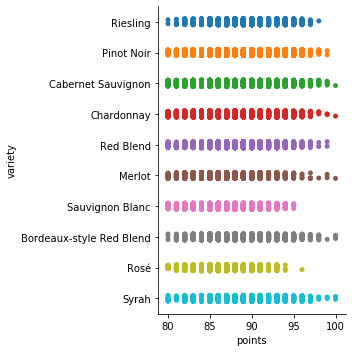

In [111]:
sns.catplot(x='points', y='variety', data=df_top10_var)
plt.show()

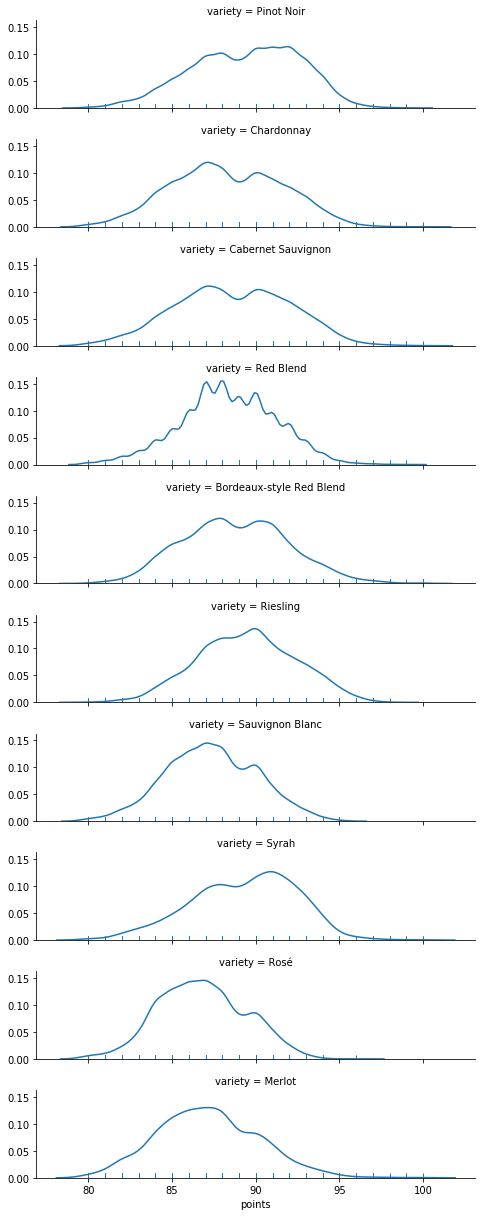

In [112]:
ordered_varieties = df_top10_var.variety.value_counts().index
g = sns.FacetGrid(df_top10_var, row='variety', row_order=ordered_varieties,
                 height=1.7,
                 aspect=4)

g.map(sns.distplot, 'points', hist=False, rug=True)
plt.show()

In [157]:
# Normalize DataFrame by Zscore

from scipy.stats import zscore
df_norm = df[['price', 'points']].apply(zscore)

# View some basic statistical details after normalization by zscore

df_norm.describe()

,price,points
count,0.0,1.199880e+05
mean,NaN,1.383802e-15
std,NaN,1.000004e+00
min,NaN,-2.729551e+00
25%,NaN,-7.896259e-01
50%,NaN,-1.429841e-01
75%,NaN,8.269786e-01
max,NaN,3.736867e+00


In [158]:
# Create a column log_price from price column
 
df['log_price'] = np.log(df['price'])

In [115]:
df_top10_var.head()

,country,variety,points,price,log_price
3,US,Riesling,87,13.0,2.564949
4,US,Pinot Noir,87,65.0,4.174387
10,US,Cabernet Sauvignon,87,19.0,2.944439
12,US,Cabernet Sauvignon,87,34.0,3.526361
14,US,Chardonnay,87,12.0,2.484907


In [116]:
df_top10_var.describe()

,points,price,log_price
count,62163.000000,62163.000000,62163.000000
mean,88.562103,38.418867,3.388541
std,3.187100,47.126377,0.668176
min,80.000000,4.000000,1.386294
25%,86.000000,18.000000,2.890372
50%,88.000000,29.000000,3.367296
75%,91.000000,46.000000,3.828641
max,100.000000,3300.000000,8.101678


In [117]:
# colocar os precos em intervalos
df_top10_var['binned_prices'] = pd.cut(df_top10_var['price'], bins=range(4, 3500, 100))

df_top10_var['binned_points'] = pd.cut(df_top10_var['points'], bins=range(80, 101, 3))

df_top10_var.head()

/Users/aliemelo/anaconda3/envs/dps19/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aliemelo/anaconda3/envs/dps19/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,country,variety,points,price,log_price,binned_prices,binned_points
3,US,Riesling,87,13.0,2.564949,"(4, 104]","(86, 89]"
4,US,Pinot Noir,87,65.0,4.174387,"(4, 104]","(86, 89]"
10,US,Cabernet Sauvignon,87,19.0,2.944439,"(4, 104]","(86, 89]"
12,US,Cabernet Sauvignon,87,34.0,3.526361,"(4, 104]","(86, 89]"
14,US,Chardonnay,87,12.0,2.484907,"(4, 104]","(86, 89]"


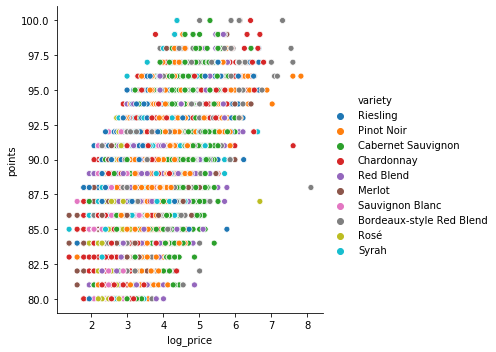

In [118]:
sns.relplot(x='log_price', 
            y='points', 
            data=df_top10_var,
            hue='variety')
plt.show()

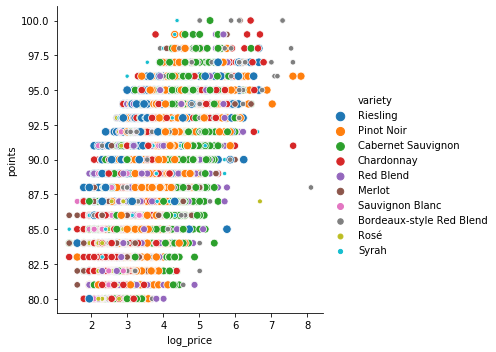

In [152]:


sns.relplot(x='log_price', 
            y='points', 
            data=df_top10_var,
            size='variety',
            hue='variety')

plt.show()

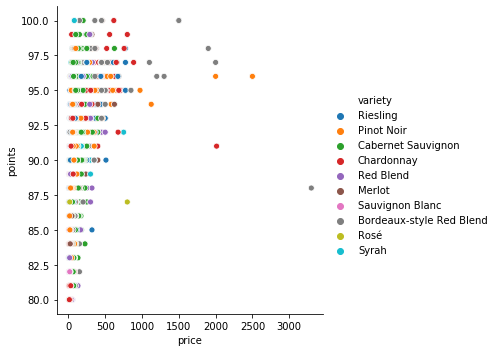

In [120]:
sns.relplot(x='price', 
            y='points', 
            data=df_top10_var, 
            hue='variety')
plt.show()

# variedade com país

In [153]:
country_var = df_top10_var.groupby(['country','variety'])['variety'].agg({'Frequency':'count'})
country_var.reset_index(inplace = True)
country_var.style.highlight_max()

/Users/aliemelo/anaconda3/envs/dps19/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,country,variety,Frequency
0,Argentina,Bordeaux-style Red Blend,79
1,Argentina,Cabernet Sauvignon,505
2,Argentina,Chardonnay,273
3,Argentina,Merlot,56
4,Argentina,Pinot Noir,97
5,Argentina,Red Blend,209
6,Argentina,Riesling,1
7,Argentina,Rosé,35
8,Argentina,Sauvignon Blanc,72
9,Argentina,Syrah,50


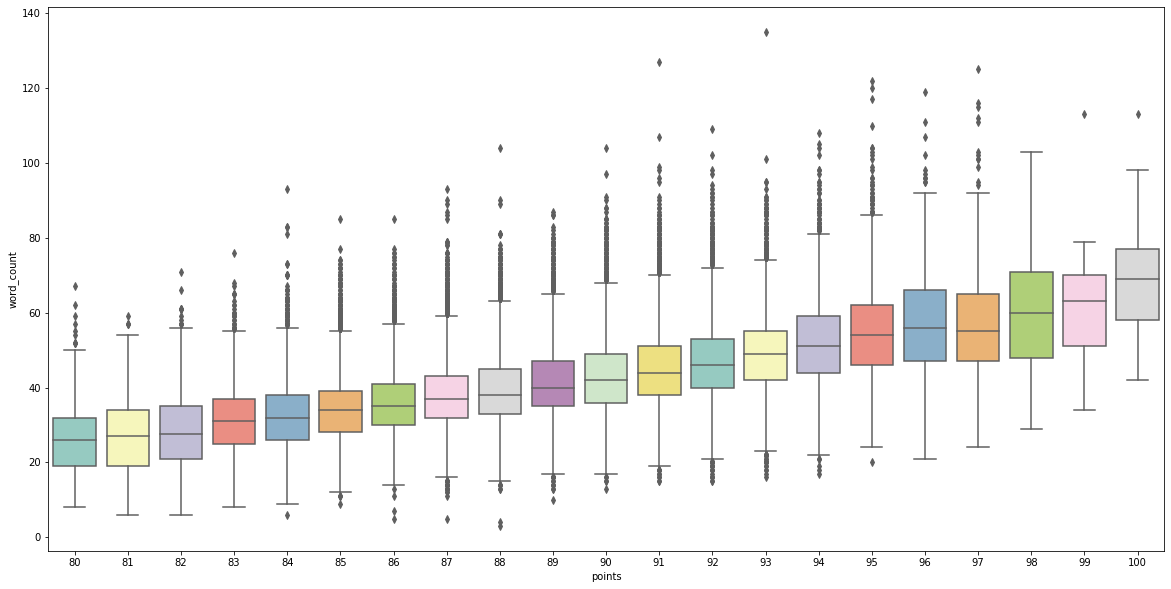

In [154]:
df['word_count'] = df['description'].apply(lambda x: len(str(x).split(" ")))
sns.boxplot(x = 'points', y = 'word_count', palette = 'Set3', data = df, linewidth = 1.5);

In [162]:
corrs = df.corr()
corrs.round(2)

,points,price,vintage,word_count,log_price
points,1.00,0.42,0.07,0.52,0.62
price,0.42,1.00,0.02,0.24,0.73
vintage,0.07,0.02,1.00,0.04,0.04
word_count,0.52,0.24,0.04,1.00,0.35
log_price,0.62,0.73,0.04,0.35,1.00
